In [3]:
# Importing the libraries
import pandas as pd
import numpy as np

In [4]:
# Reading a CSV file named "spam.csv" into a Pandas DataFrame called 'data'
data = pd.read_csv("spam.csv", encoding_errors="ignore")

In [5]:
df = data.copy()

In [6]:
df.shape

(5572, 5)

# 1 Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [9]:
#renaming the columns
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# checking  duplicate values
df.duplicated().sum()

404

In [14]:
#remove duplicates
df.drop_duplicates(keep="first",inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5168, 2)

# 2 EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df["target"].value_counts()

0    4516
1     652
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

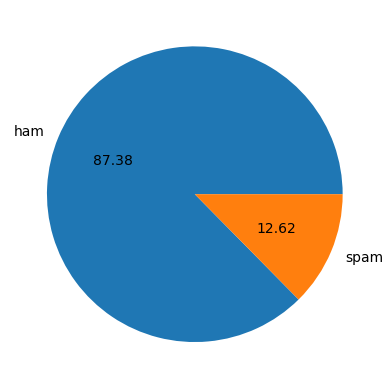

In [20]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [21]:
# Data  is imbalanced

In [22]:
import nltk

In [23]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\atulr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df["num_characters"] = df['text'].apply(len)

In [25]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159
5568,0,Will _ b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [26]:
# number of words
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
# sentences
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df.iloc[:,2:5].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham
df[df["target"] ==0].iloc[:,2:5].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df["target"] ==1].iloc[:,2:5].describe()

,num_characters,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [33]:
import seaborn as sns

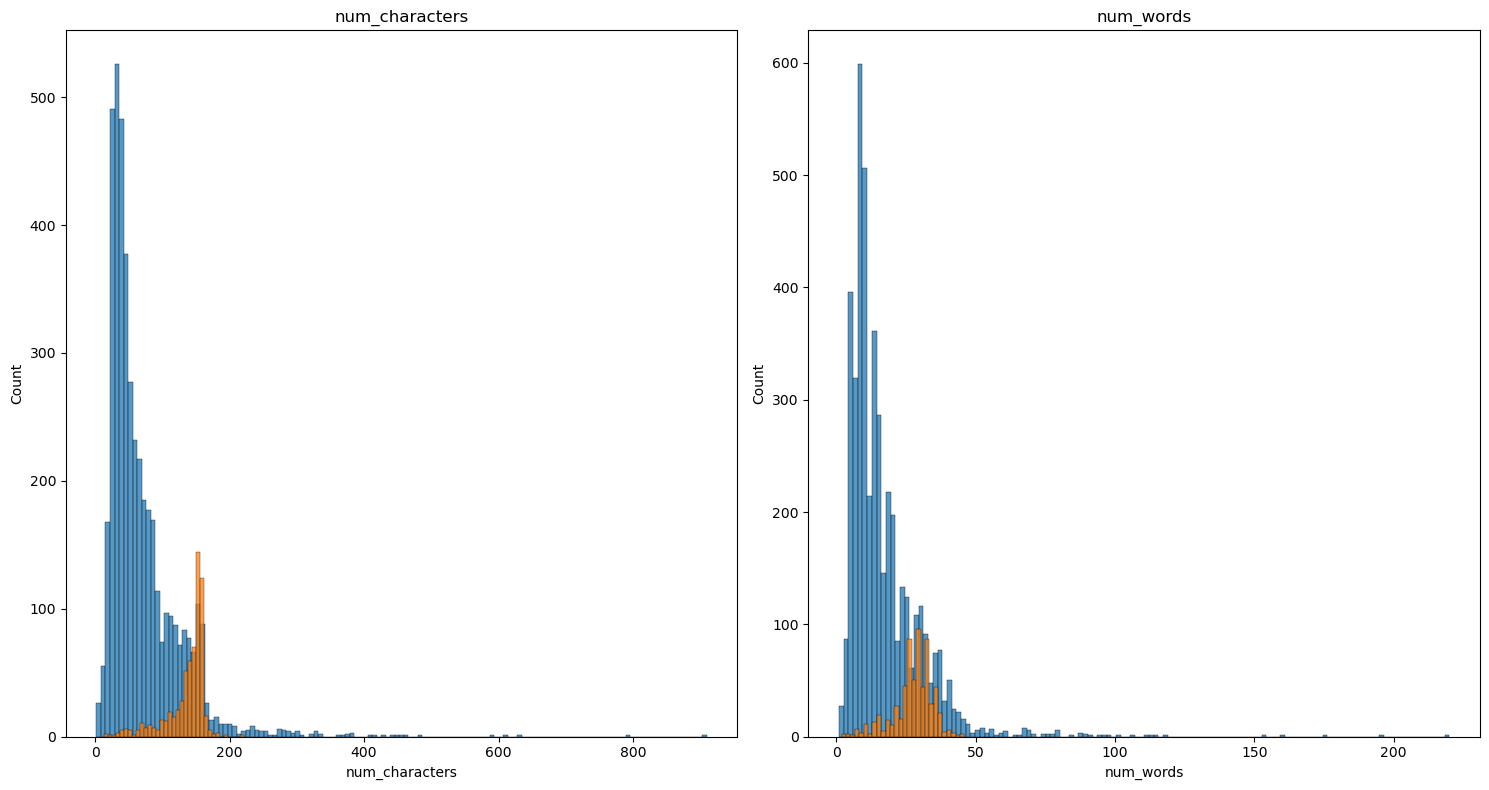

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
variables = ["num_characters","num_words","num_sentences"]
# Create histograms for each variable in subplots
for variable, ax in zip(variables, axes.flatten()):
    sns.histplot(data=df[df['target'] == 0], x=variable, ax=ax)
    sns.histplot(data=df[df['target'] == 1], x=variable, ax=ax)
    ax.set_title(variable)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

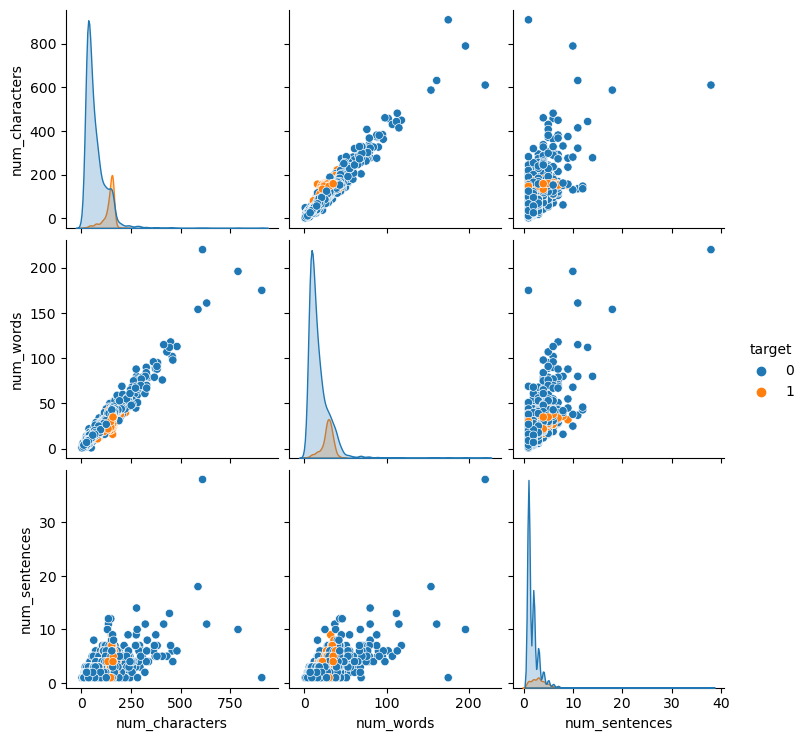

In [35]:
sns.pairplot(df,hue="target")

<Axes: >

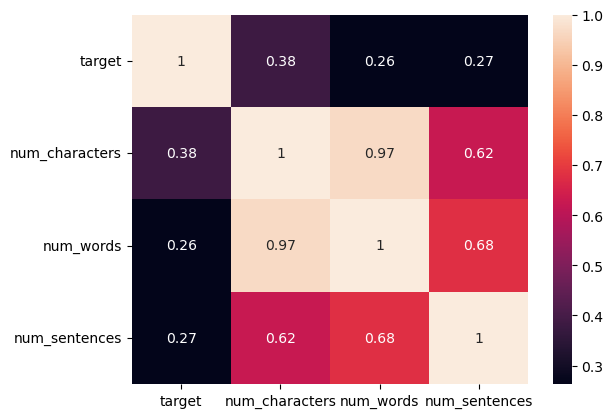

In [36]:
sns.heatmap(df.corr(numeric_only="True"),annot=True)

# 3 Data Preprocessing

In [37]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atulr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# Importing necessary modules from NLTK for text processing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Defining a function 'transform_text' to preprocess text data
def transform_text(text):
    # Creating a PorterStemmer instance for stemming words
    ps = PorterStemmer()
    
    # Converting text to lowercase
    text = text.lower()
    
    # Tokenizing the text into words
    text = nltk.word_tokenize(text)
    
    # Filtering out non-alphanumeric characters
    y = [i for i in text if i.isalnum()]
    text = y[:]
    y.clear()
    
    # Removing stopwords and punctuation from the text
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    # Applying stemming to each word in the text
    for i in text:
        y.append(ps.stem(i))
    
    # Joining the processed words to form a cleaned text
    return " ".join(y)


In [39]:
df["transformed_text"] = df["text"].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

In [42]:
span_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

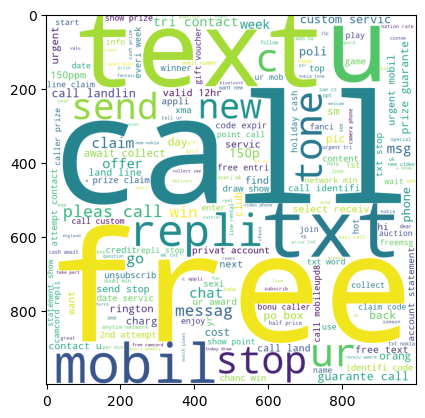

In [43]:
plt.imshow(span_wc)

In [44]:
non_span_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

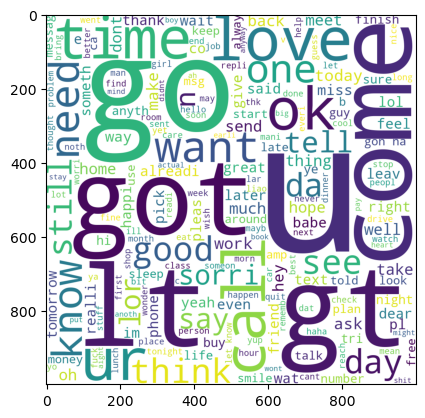

In [45]:
plt.imshow(non_span_wc)

In [46]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [47]:
spam_corpus =[]
for msg in df[df["target"] ==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

10106

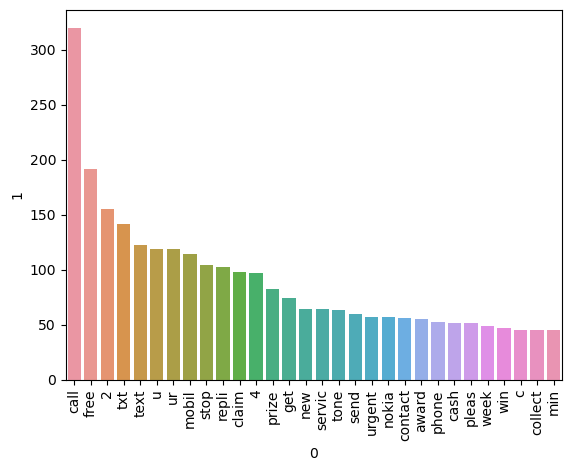

In [49]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [50]:
non_spam_corpus =[]
for msg in df[df["target"] ==0]["transformed_text"].tolist():
    for word in msg.split():
        non_spam_corpus.append(word)

In [51]:
len(non_spam_corpus)

35380

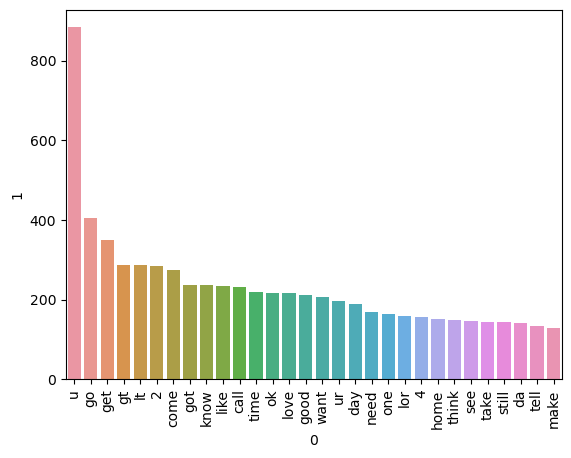

In [52]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(non_spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(non_spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# 4 Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [54]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [56]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [57]:
X.shape

(5168, 3000)

In [58]:
y =df["target"].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb =GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [65]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [261]:
#tfidf >MNB

In [262]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))